DECISION TREE

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [248]:
df = pd.read_csv('C:/Users/Jessie Angelica/OneDrive/Documents/Alibaba task/infovesta/dataset_clean.csv') 

In [249]:
df.shape

(3691, 93)

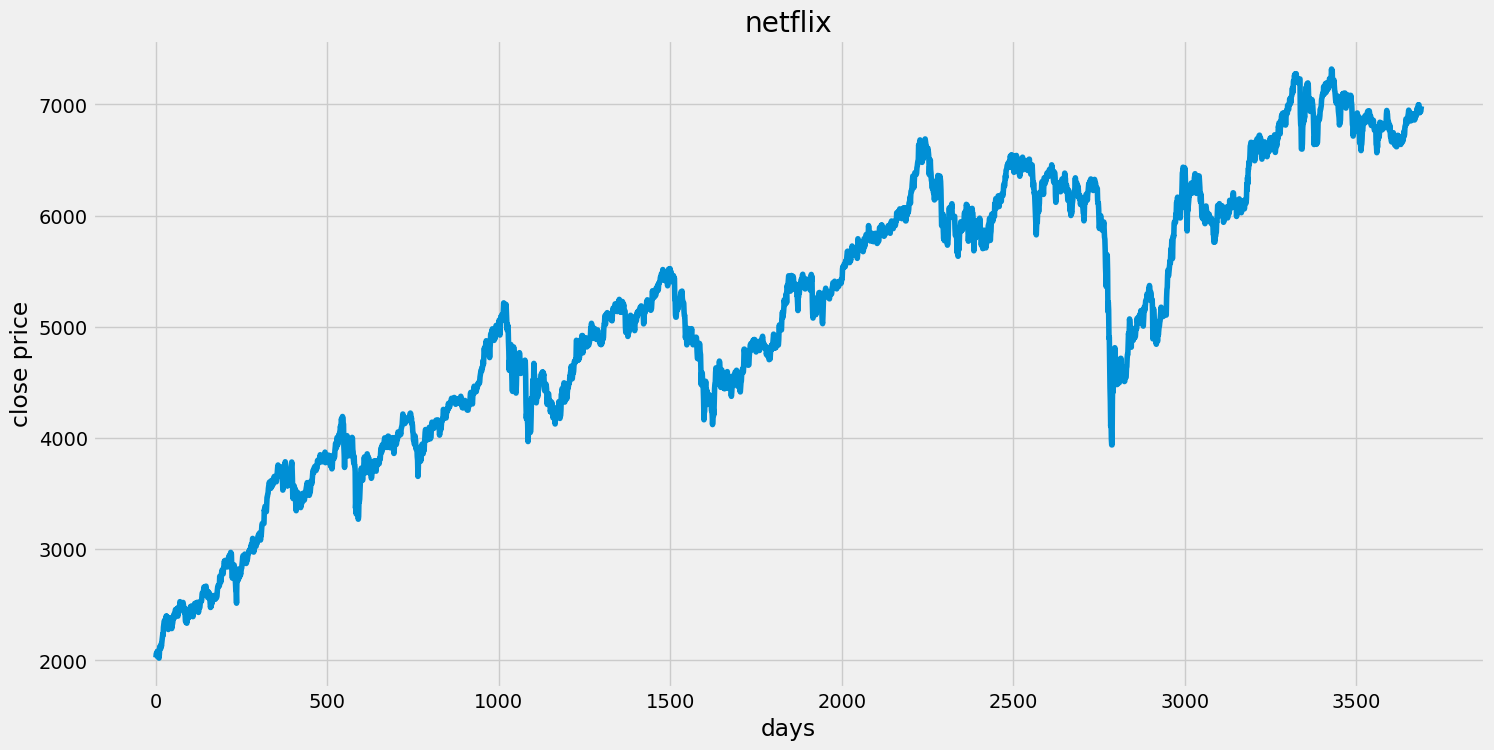

In [250]:
plt.figure(figsize=(16,8))
plt.title('netflix')
plt.xlabel('days')
plt.ylabel('close price')
plt.plot(df['IHSG_Close'])
plt.show()

In [251]:
df2 = df['IHSG_Close']

In [252]:
df2 = pd.DataFrame(df2) 

In [253]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['IHSG_Close'].shift(-future_days)

In [254]:
df.tail()

,Tanggal,Indeks Keyakinan Bisnis,Indeks Keyakinan Konsumen,Inflasi Indonesia (Year on Year) (%),Inflasi Tahunan (US),Kepemilikan Investor Asing di Saham (Rp Miliar),PDB Indonesia YOY,Suka Bunga Acuan (AS),Suku Bunga Indonesia,IHSG_Close,...,IHSG_Close_lag_8,IHSG_Close_lag_9,IHSG_Close_lag_10,IHSG MA 5,IHSG MA 10,IHSG Stdev 5,IHSG Stdev 10,IHSG EWMA 5,IHSG EWMA 10,Stochastic Oscillator
3686,9/11/2023,16.62,125.0,3.27,3.7,2869694.0,5.17,5.5,5.75,6963.393066,...,6966.655762,6957.834961,6921.727051,6972.799805,6964.113037,32.003249,27.116475,6957.304775,6955.076495,-21.291199
3687,9/12/2023,16.62,125.0,3.27,3.7,2869694.0,5.17,5.5,5.75,6933.969238,...,6953.259766,6966.655762,6957.834961,6966.128418,6968.279639,29.108288,22.725585,6959.334892,6956.597886,8.292787
3688,9/13/2023,16.62,125.0,3.27,3.7,2869694.0,5.17,5.5,5.75,6935.476074,...,6977.653809,6953.259766,6966.655762,6954.580664,6965.893066,27.849210,25.075940,6950.877766,6952.462934,-5.639142
3689,9/14/2023,16.62,125.0,3.27,3.7,2869694.0,5.17,5.5,5.75,6959.333008,...,6996.750000,6977.653809,6953.259766,6942.485254,6962.775098,16.000969,26.846517,6945.743097,6949.361742,-5.817190
3690,9/15/2023,16.62,125.0,3.27,3.7,2869694.0,5.17,5.5,5.75,6982.791016,...,6991.708008,6996.750000,6977.653809,6943.390234,6963.382422,16.970734,26.675493,6950.273521,6951.180781,5.147413


In [257]:
X = np.array(df2.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[2026.780029]
 [2059.884033]
 [2065.75293 ]
 ...
 [6910.146973]
 [6945.477051]
 [6915.71582 ]]


In [258]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[2473.789063 2484.229004 2468.788086 ... 6935.476074 6959.333008
 6982.791016]


In [221]:
x_train = df[['Indeks Keyakinan Bisnis', 'Indeks Keyakinan Konsumen',
       'Inflasi Indonesia (Year on Year) (%)', 'Inflasi Tahunan (US)',
       'Kepemilikan Investor Asing di Saham (Rp Miliar)', 'PDB Indonesia YOY',
       'Suka Bunga Acuan (AS)', 'Suku Bunga Indonesia', 'NASDAQ',
       'S&P 500', 'Neraca Dagang Indonesia']]
y_train = df['IHSG_Close']


In [259]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [260]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [261]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [263]:
x_future = df2.drop(['Prediction'], axis= 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[6715.118164],
       [6734.452148],
       [6810.315918],
       [6801.749023],
       [6751.859863],
       [6812.192871],
       [6779.698242],
       [6768.315918],
       [6820.663086],
       [6824.432129],
       [6800.672852],
       [6835.808105],
       [6923.026855],
       [6850.52002 ],
       [6860.077148],
       [6850.619141],
       [6850.983887],
       [6888.757813],
       [6813.23877 ],
       [6653.84082 ],
       [6684.558105],
       [6688.265137],
       [6622.499023],
       [6584.453125],
       [6629.934082],
       [6641.830078],
       [6688.057129],
       [6767.339844],
       [6765.786133],
       [6819.907227],
       [6874.931152],
       [6874.931152],
       [6860.854004],
       [6829.930176],
       [6864.817871],
       [6898.980957],
       [6872.480957],
       [6839.341797],
       [6862.257813],
       [6890.571777],
       [6911.731934],
       [6873.791016],
       [6935.300781],
       [6940.124023],
       [6897.365234],
       [68

In [264]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

[6915.101074  6863.301758  6812.722168  6711.740234  6787.630859
 6769.630859  6779.97998   6811.904785  6755.937988  6707.763184
 6711.740234  6676.563965  6663.11377   6663.11377   6700.561035
 6663.11377   6736.684082  6745.804199  6704.230957  6687.000977
 6681.102051  6636.422852  5944.074219  6633.26123   5821.812012
 6854.509766  6636.422852  6619.754883  6931.358887  6694.023926
 6720.6936035 6720.6936035 6699.716797  6713.794922  6698.546875
 6686.059082  6808.208984  6869.571777  6652.26123   6639.73291
 6664.667969  6661.878906  7045.526855  6661.878906  6661.878906
 6696.71582   6681.753906  6718.977051  6757.331055  6796.923828
 6796.923828  6796.923828  6808.208984  6812.722168  6869.571777
 6867.144043  6867.144043  6830.203125  6830.203125  6867.144043
 6704.230957  6646.410156  6948.278809  6779.97998   6900.22998
 6931.358887  6886.496094  6854.509766  6898.077148  6852.841797
 6886.366211  6868.812988  6886.6274415 6886.6274415 6886.6274415
 6910.171875  6915.101074 

In [265]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[6647.67037301 6664.71395625 6731.59052338 6724.03850575 6680.05946598
 6733.24512311 6704.59997091 6694.56605413 6740.71191394 6744.03445719
 6723.08982336 6754.06277799 6830.94915721 6767.03184571 6775.45678837
 6767.11922434 6767.4407607  6800.73979788 6734.16711966 6593.65225067
 6620.73061195 6623.99849034 6566.02336021 6532.4845702  6572.57762481
 6583.06436143 6623.81512401 6693.70561075 6692.33596016 6740.04559779
 6788.55111252 6788.55111252 6776.14161411 6748.88117795 6779.63590154
 6809.75185694 6786.39117992 6757.1778511  6777.37912086 6802.3388706
 6820.99228923 6787.54604276 6841.76905234 6846.02090889 6808.3275406
 6793.30959428 6810.77371466 6847.54680804 6823.46601038 6806.82789885
 6806.87180282 6805.99285073 6787.20556662 6731.28362138 6757.27685189
 6772.37055556 6770.78439468 6760.61316913 6762.1093676  6773.11004616
 6734.51749456 6728.66828692 6693.19253007 6701.6661123  6722.31589736
 6691.90896665 6710.99712571 6583.05015726 6570.99361664 6515.97774127
 6615.15

In [266]:
predictions = lr_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

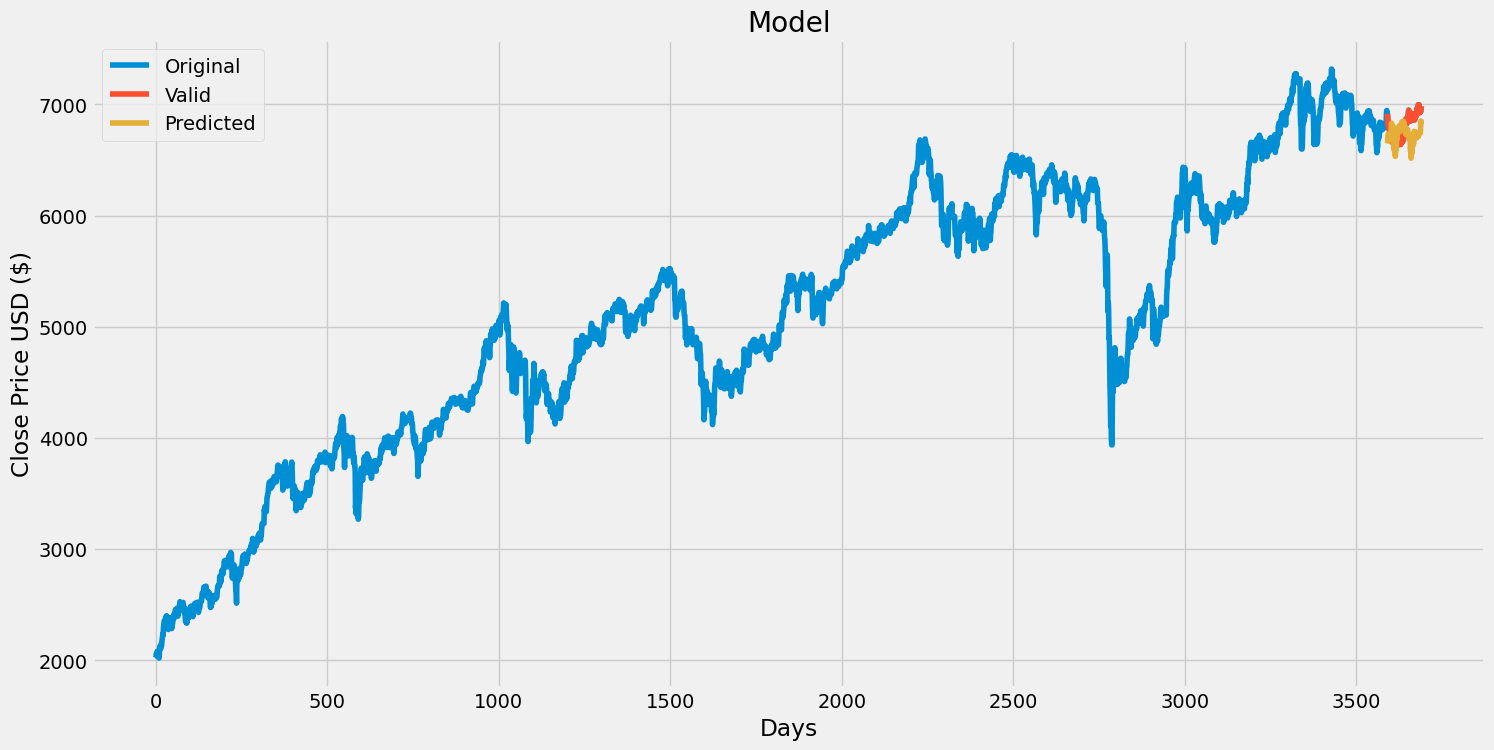

In [267]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['IHSG_Close'])
plt.plot(valid[['IHSG_Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [272]:
# Importing necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Print actual and predicted stock prices for 7 days
actual_prices = valid['IHSG_Close'].tail(7)
print("Actual Prices:")
print(actual_prices)
print("\nPredicted Prices:")
print(valid['Predictions'].tail(7))

# Calculate and print accuracy
accuracy = lr.score(x_test, y_test)
print("\nAccuracy:", accuracy)

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(valid['IHSG_Close'], valid['Predictions'])
print("\nMean Squared Error (MSE):", mse)

# Calculate and print Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_prices - valid['Predictions'].tail(7)) / actual_prices)) * 100
print("\nMean Absolute Percentage Error (MAPE):", mape)

# Calculate and print Mean Relative Squared Error (MRSE)
rmse = np.sqrt(mse) / np.mean(valid['IHSG_Close'])
print("\nMean Relative Squared Error (MRSE):", rmse)


Actual Prices:
3684    6954.808105
3685    6924.779785
3686    6963.393066
3687    6933.969238
3688    6935.476074
3689    6959.333008
3690    6982.791016
Name: IHSG_Close, dtype: float64

Predicted Prices:
3684    6741.720428
3685    6741.720428
3686    6741.720428
3687    6741.720428
3688    6819.595091
3689    6850.739790
3690    6824.504224
Name: Predictions, dtype: float64

Accuracy: 0.8630060154107595

Mean Squared Error (MSE): 26004.46678041354

Mean Absolute Percentage Error (MAPE): 2.4516355698830457

Mean Relative Squared Error (MRSE): 0.023701539834671284


LSTM

In [22]:
# Import libraries
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'
import warnings
warnings.filterwarnings('ignore')
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [23]:
BATCH_SIZE= 1
EPOCHS=2

In [24]:
data = pd.read_csv('C:/Users/Jessie Angelica/OneDrive/Documents/Alibaba task/infovesta/dataset_clean.csv') 

In [25]:
data.shape

(3691, 93)

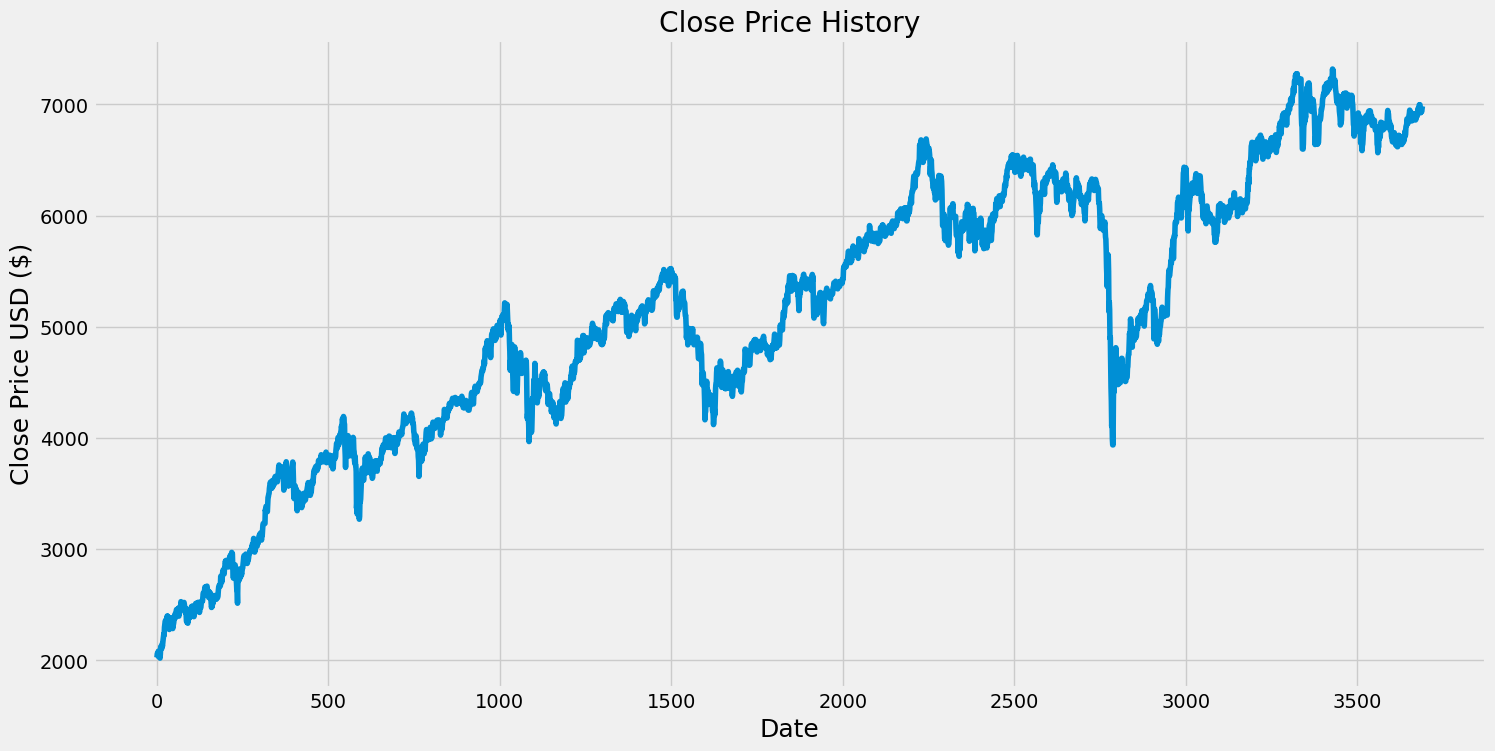

In [26]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(data['IHSG_Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:
data = data.filter(['IHSG_Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
# Here i am using 80% data for training
# math.ceil is used for round it up
training_data_len = math.ceil(len(dataset)*.7)
training_data_len

2584

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data variable store our scaler data values
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00125352],
       [0.00750206],
       [0.00860984],
       ...,
       [0.92779371],
       [0.93229682],
       [0.93672464]])

In [29]:
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train datasets
X_train = []    # Independent feature
y_train = []    # Dependent feature

for i in range(60, len(train_data)):
    # We append the past 60 values to our x_train data
    X_train.append(train_data[i-60:i,0])
    # y_train will contain the 60first values
    y_train.append(train_data[i, 0])
#     if i<= 60:
#         print(f"X_train contain past 60 values: \n\n{x_train}\n\n")
#         print(f"Y_train contain the 60first values:  \n{y_train}")
#         print()
    if i<= 61:
        print(f"X_train contain past 60 values: \n\n{X_train}\n\n")
        print(f"Y_train contain the 60first values:  \n{y_train}")
        print()

X_train contain past 60 values: 

[array([0.00125352, 0.00750206, 0.00860984, 0.01041228, 0.00280697,
       0.01191195, 0.01191195, 0.01204918, 0.00810796, 0.        ,
       0.00687824, 0.01946799, 0.01846228, 0.01627331, 0.01627331,
       0.02386143, 0.0199091 , 0.02653478, 0.03124176, 0.0356675 ,
       0.04095337, 0.03882177, 0.05247309, 0.05721104, 0.06014826,
       0.06416815, 0.05604584, 0.06414607, 0.06209922, 0.06973038,
       0.07156392, 0.06176415, 0.07103807, 0.0692213 , 0.0692213 ,
       0.0598066 , 0.04862569, 0.05823085, 0.05922333, 0.0671467 ,
       0.06802384, 0.06794191, 0.06340746, 0.06740587, 0.06066545,
       0.05790527, 0.0501684 , 0.05702417, 0.05711666, 0.06044932,
       0.06628371, 0.06855555, 0.07393981, 0.07471049, 0.0684355 ,
       0.07549625, 0.07912941, 0.082457  , 0.082457  , 0.082457  ])]


Y_train contain the 60first values:  
[0.08245699925002509]

X_train contain past 60 values: 

[array([0.00125352, 0.00750206, 0.00860984, 0.01041228, 0.0028

In [30]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [31]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2524, 60, 1)

In [32]:
# Build the LSTM Model
model = Sequential()
# Input shape( no.of time steps, no of features)
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [33]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss ='mean_squared_error'
)

In [34]:
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/2
2524/2524 [==============================] - 45s 17ms/step - loss: 0.0014
Epoch 2/2
2524/2524 [==============================] - 39s 16ms/step - loss: 3.7625e-04


In [35]:
test_data = scaled_data[training_data_len - 60:, :]
# CREATE THE DATA SETS X_TEST AND Y_TEST
X_test = []
# y_test contain actucal value that model is going to predict
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    # x_test contain past 60 values
    X_test.append(test_data[i-60:i, 0])
    

In [36]:
X_test = np.array(X_test)

In [37]:
data.shape

(3691, 1)

In [38]:
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(1107, 60, 1)


In [39]:
# Get the models predicted price values
predictions = model.predict(X_test)
# Here are unscaling the data to see the actual values that y_test contains
predictions = scaler.inverse_transform(predictions)

35/35 [==============================] - 1s 11ms/step


In [273]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Print actual and predicted stock prices for validation set
actual_prices = valid['IHSG_Close']
predicted_prices = valid['Predictions']

# Calculate and print accuracy
accuracy = 1 - (mean_absolute_error(actual_prices, predicted_prices) / np.mean(actual_prices))
print("Accuracy:", accuracy)

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(actual_prices, predicted_prices)
print("Mean Squared Error (MSE):", mse)

# Calculate and print Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate and print Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


Accuracy: 0.9796672250073913
Mean Squared Error (MSE): 26004.46678041354
Root Mean Squared Error (RMSE): 161.25900526920518
Mean Absolute Percentage Error (MAPE): 2.020242971761724


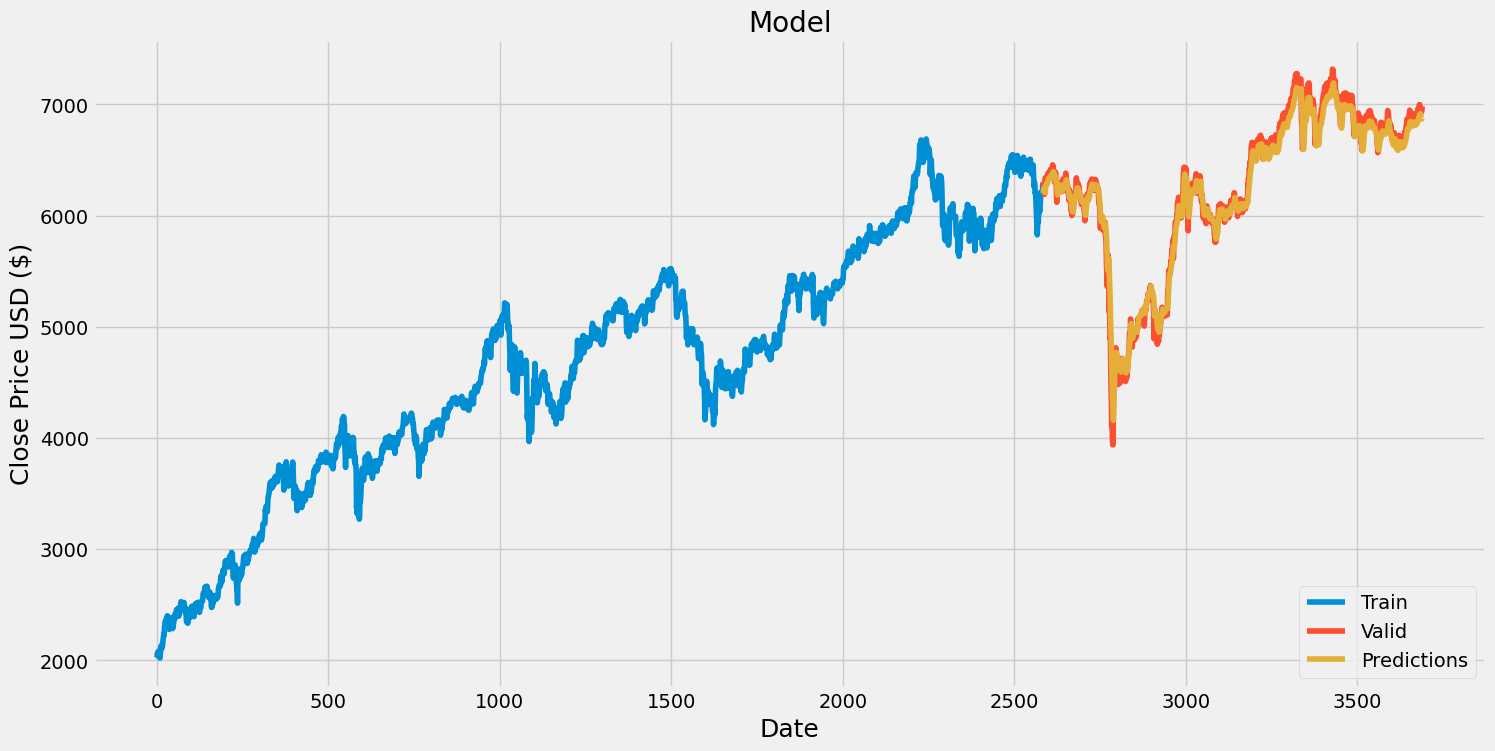

In [42]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['IHSG_Close'])
plt.plot(valid[['IHSG_Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [43]:
# Show the valid and predicted prices
valid

,IHSG_Close,Predictions
2584,6305.992188,6203.895020
2585,6276.176758,6230.757324
2586,6273.082031,6241.981445
2587,6250.265137,6244.286133
2588,6190.524902,6236.107910
...,...,...
3686,6963.393066,6885.174805
3687,6933.969238,6880.450195
3688,6935.476074,6872.864258
3689,6959.333008,6868.575684


In [44]:
# Create a new dataframe
new_df = data.filter(['IHSG_Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 21ms/step


[[6889.8706]]


In [45]:
data = pd.read_csv('C:/Users/Jessie Angelica/OneDrive/Documents/Alibaba task/infovesta/dataset_clean.csv') 


In [46]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'])  # Convert the 'Date' column to datetime format

forecast_period = 7  # Adjust this based on how many days you want to forecast
forecast_dates = pd.date_range(start=data['Tanggal'].iloc[-1], periods=forecast_period + 1, freq='B')[1:]

forecast_df = pd.DataFrame(index=forecast_dates, columns=['IHSG_Close'])

# Use the last 60 days to predict the next day and repeat
for i in range(forecast_period):
    # Get the last 60 day closing price values and convert the dataframe to an array
    last_60_days = new_df[-60:].values
    # Scale the data to be values between 0 and 1
    last_60_days_scaled = scaler.transform(last_60_days)
    # Create an empty list
    X_test = []
    # Append the past 60 days
    X_test.append(last_60_days_scaled)
    # Convert the X_test data set to a numpy array
    X_test = np.array(X_test)
    # Reshape the data
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # Get the predicted scaled price
    pred_price = model.predict(X_test)
    # Undo the scaling
    pred_price = scaler.inverse_transform(pred_price)
    
    # Append the predicted price to the forecast dataframe
    forecast_df['IHSG_Close'].iloc[i] = pred_price[0, 0]
    
    # Update the last_60_days for the next iteration
    new_df = pd.concat([new_df, pd.DataFrame({'IHSG_Close': [pred_price[0, 0]]}, index=[forecast_dates[i]])])

# Print the forecasted prices with dates
print(forecast_df)


1/1 [==============================] - 0s 24ms/step
             IHSG_Close
2023-09-18  6889.870605
2023-09-19   6873.18457
2023-09-20  6848.533203
2023-09-21   6821.78418
2023-09-22  6795.343262
2023-09-25  6770.263672
2023-09-26  6746.998047


RandomForestRegressor

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import timedelta

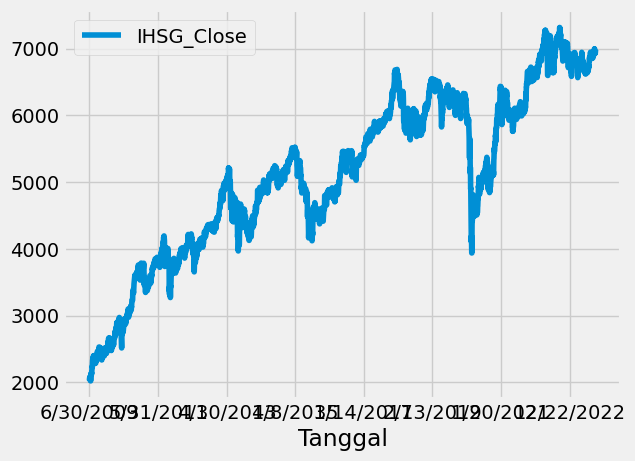

In [48]:
# Baca dataset
df = pd.read_csv('C:/Users/Jessie Angelica/OneDrive/Documents/Alibaba task/infovesta/dataset_clean.csv')
df = df.dropna()
df
df.plot(x="Tanggal", y="IHSG_Close")
model = RandomForestRegressor()
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Numerical_Date'] = df['Tanggal'].astype('int64').astype('int32')  # Two-step conversion

In [54]:
X = df[['Indeks Keyakinan Bisnis', 'Indeks Keyakinan Konsumen',
       'Inflasi Indonesia (Year on Year) (%)', 'Inflasi Tahunan (US)',
       'Kepemilikan Investor Asing di Saham (Rp Miliar)', 'PDB Indonesia YOY',
       'Suka Bunga Acuan (AS)', 'Suku Bunga Indonesia', 'IHSG_Close', 'NASDAQ',
       'S&P 500', 'Neraca Dagang Indonesia']]
X = X[:int(len(df)-1)]
y = df['IHSG_Close']
y = y[:int(len(df)-1)]
model.fit(X,y)

RandomForestRegressor()

In [65]:
predictions = model.predict(X)
print('The model score is:,', model.score(X,y))
new_data = df[['Indeks Keyakinan Bisnis', 'Indeks Keyakinan Konsumen',
       'Inflasi Indonesia (Year on Year) (%)', 'Inflasi Tahunan (US)',
       'Kepemilikan Investor Asing di Saham (Rp Miliar)', 'PDB Indonesia YOY',
       'Suka Bunga Acuan (AS)', 'Suku Bunga Indonesia', 'IHSG_Close', 'NASDAQ',
       'S&P 500', 'Neraca Dagang Indonesia']].tail(1)


The model score is:, 0.9999995516223583


In [73]:

print('The model predicts the last row or day to be:', prediction)
print('actual value is', df[['IHSG_Close']].tail(1).values[0][0])


The model predicts the last row or day to be: [6984.10826668]
actual value is 6982.791016


In [78]:
train_predictions = model.predict(X_train)

# Predictions on the test set
test_predictions = model.predict(X_test)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the results
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Squared Error (MSE): 7.1476896851510165
Root Mean Squared Error (RMSE): 2.673516352138325
Mean Absolute Percentage Error (MAPE): 0.03575956589195485


In [80]:
# ... (your existing code)

# Convert 'Tanggal' to datetime type
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# ... (your existing code)

# Extend the date range by one week
last_date = df['Tanggal'].max()
new_dates = pd.date_range(last_date, last_date + pd.DateOffset(days=6))

# Create a new DataFrame with the extended date range
new_data = pd.DataFrame({'Tanggal': new_dates})
new_data['Numerical_Date'] = new_data['Tanggal'].astype('int64').astype('int32')  # Two-step conversion

# Use the same features used for training
features_used_for_training = ['Indeks Keyakinan Bisnis', 'Indeks Keyakinan Konsumen',
                               'Inflasi Indonesia (Year on Year) (%)', 'Inflasi Tahunan (US)',
                               'Kepemilikan Investor Asing di Saham (Rp Miliar)', 'PDB Indonesia YOY',
                               'Suka Bunga Acuan (AS)', 'Suku Bunga Indonesia', 'IHSG_Close', 'NASDAQ',
                               'S&P 500', 'Neraca Dagang Indonesia']
new_data[features_used_for_training] = df[features_used_for_training].tail(1).values[0]

# Make predictions for the next week
next_week_predictions = model.predict(new_data[features_used_for_training])

# Print the predictions
print('Model predictions for the next week:', next_week_predictions)



Model predictions for the next week: [6982.66076183 6982.66076183 6982.66076183 6982.66076183 6982.66076183
 6982.66076183 6982.66076183]
